In [2]:
import pandas as pd
import numpy as np

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [91]:
from collections import OrderedDict

### Data Acquisition & Understanding ###

In [122]:
df = pd.read_csv('Breast_cancer.csv')
df.shape

(569, 32)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                565 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    561 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Wrangling ###

In [81]:
df['target'] = np.where(df['diagnosis'] == 'B', 0, 
                       np.where(df['diagnosis'] == 'M', 1, df['diagnosis'])).astype(np.float64)
df['target'].value_counts()

0.0    357
1.0    212
Name: target, dtype: int64

#### Imputing Missing data ####

In [123]:
null_chk = df.isnull().sum()

In [124]:
null_chk[null_chk > 0]

radius_mean     4
area_se         8
radius_worst    8
dtype: int64

In [125]:
df[['radius_mean', 'area_se', 'radius_worst']].describe()

,radius_mean,area_se,radius_worst
count,565.000000,561.000000,561.000000
mean,14.136894,40.279319,16.291193
std,3.530486,45.646436,4.837590
min,6.981000,6.802000,7.930000
25%,11.700000,17.850000,13.030000
50%,13.370000,24.440000,14.980000
75%,15.850000,45.190000,18.810000
max,28.110000,542.200000,36.040000


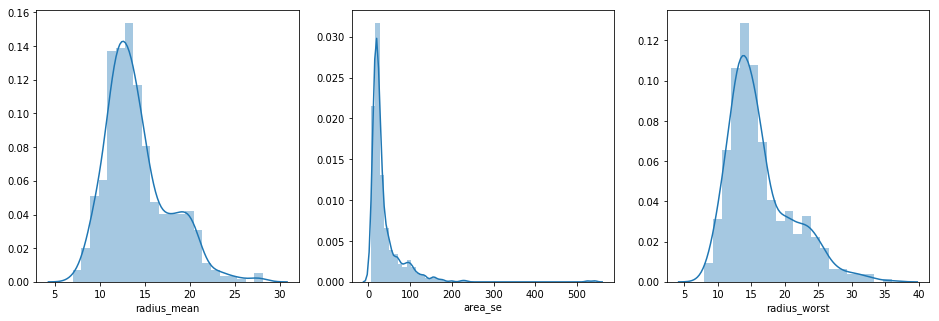

In [63]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df[~df['radius_mean'].isnull()]['radius_mean'])
plt.subplot(1,3,2)
sns.distplot(df[~df['area_se'].isnull()]['area_se'])
plt.subplot(1,3,3)
sns.distplot(df[~df['radius_worst'].isnull()]['radius_worst'])
plt.show()

#### Finding and Removing Outliers ####

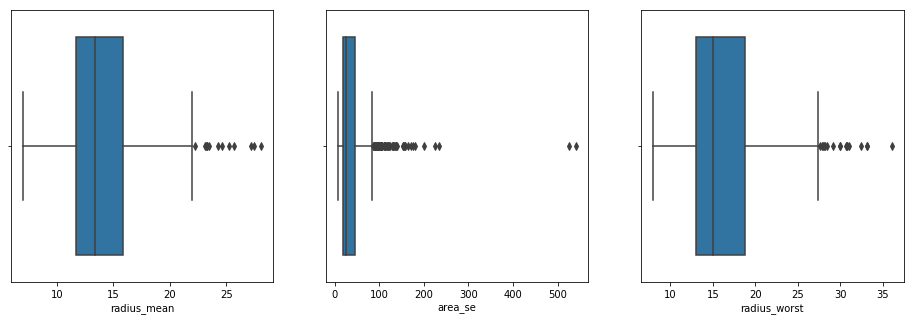

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(df['radius_mean'])
plt.subplot(1,3,2)
sns.boxplot(df['area_se'])
plt.subplot(1,3,3)
sns.boxplot(df['radius_worst'])
plt.show()

# sns.boxplot(df['radius_mean'])

In [129]:
for col in ['radius_mean', 'area_se', 'radius_worst']:
    p25 = df[col].quantile(0.25)
    p75 = df[col].quantile(0.75)
    iqr = p75 - p25
    upper_limit = p75 + 1.5 * iqr
    lower_limit = p25 - 1.5 * iqr
    mean_after_outliers_removal = df[(df[col] < upper_limit)
       & (df[col] > lower_limit)
      ][col].mean()
    print(f'col_name: {col}\t25%: {p25}\t75%: {p75}\tupper_limit: {upper_limit}\tlower_limit: {lower_limit}\tmean after removing outliers: {mean_after_outliers_removal}')
    df[col].fillna(mean_after_outliers_removal, inplace=True)

col_name: radius_mean	25%: 11.7	75%: 15.85	upper_limit: 22.075	lower_limit: 5.474999999999999	mean after removing outliers: 13.887907608695661
col_name: area_se	25%: 17.85	75%: 45.19	upper_limit: 86.19999999999999	lower_limit: -23.15999999999999	mean after removing outliers: 28.270116700201207
col_name: radius_worst	25%: 13.03	75%: 18.81	upper_limit: 27.479999999999997	lower_limit: 4.360000000000001	mean after removing outliers: 15.85293933823529


#### dimensionality reduction ####

In [84]:
df_corr = df.corr(method='pearson')
df_abs_corr = np.abs(df_corr)
df_abs_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
id,1.000000,0.074359,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,...,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866,0.039769
radius_mean,0.074359,1.000000,0.320785,0.996445,0.986327,0.173116,0.506557,0.677141,0.823112,0.149256,...,0.293718,0.963817,0.940176,0.120642,0.413431,0.526670,0.744336,0.163884,0.007332,0.729629
texture_mean,0.099770,0.320785,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.996445,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.986327,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.012968,0.173116,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506557,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.677141,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.823112,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.022114,0.149256,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


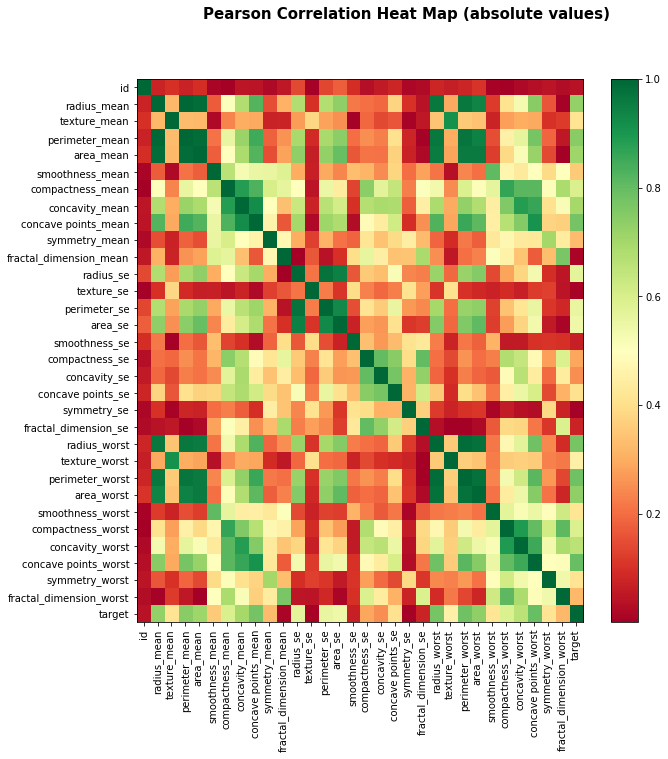

In [85]:
plt.figure(figsize=(10, 10))
plt.imshow(df_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df_abs_corr)), df_abs_corr.columns, rotation='vertical')
plt.yticks(range(len(df_abs_corr)), df_abs_corr.columns);
plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
plt.show()

####  Univariate feature reduction ####
(remove low correlations with the target)

In [87]:
CORRELATION_MIN = 0.1
CORRELATION_MAX = 0.8
s_corr_target = df_abs_corr['target']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)
s_low_correlation_ftrs = s_corr_target_sort[s_corr_target_sort <= CORRELATION_MIN]
print("Removed %d low correlation features:" % len(s_low_correlation_ftrs))
for i,v in enumerate(s_low_correlation_ftrs):
    print(i,np.round(v, 4), s_low_correlation_ftrs.index[i])
s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELATION_MIN]

print("Remaining %d feature correlations:" % (len(s_corr_target_sort)-1))
for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'target':
        continue
    print(i,np.round(v, 4), ftr)

Removed 6 low correlation features:
0 0.078 fractal_dimension_se
1 0.067 smoothness_se
2 0.0398 id
3 0.0128 fractal_dimension_mean
4 0.0083 texture_se
5 0.0065 symmetry_se
Remaining 25 feature correlations:
1 0.7936 concave points_worst
2 0.7829 perimeter_worst
3 0.7766 concave points_mean
4 0.7703 radius_worst
5 0.7426 perimeter_mean
6 0.7338 area_worst
7 0.7296 radius_mean
8 0.709 area_mean
9 0.6964 concavity_mean
10 0.6596 concavity_worst
11 0.5965 compactness_mean
12 0.591 compactness_worst
13 0.5671 radius_se
14 0.5561 perimeter_se
15 0.541 area_se
16 0.4569 texture_worst
17 0.4215 smoothness_worst
18 0.4163 symmetry_worst
19 0.4152 texture_mean
20 0.408 concave points_se
21 0.3586 smoothness_mean
22 0.3305 symmetry_mean
23 0.3239 fractal_dimension_worst
24 0.293 compactness_se
25 0.2537 concavity_se


In [95]:
CORRELATION_MAX = 0.8

df1_cols = list(set(s_corr_target_sort.index) - set(s_low_correlation_ftrs.index))

df1 = df[df1_cols]
df1_corr = df1.corr(method='pearson')
df1_abs_corr = np.abs(df1_corr)
df1_abs_corr

# Get all the feature pairs
Xcorr1 = df1_abs_corr.iloc[1:,1:]
s_pairs = Xcorr1.unstack()
print("s_pairs.shape", s_pairs.shape)
s_pairs = np.round(s_pairs, decimals=4)

# Sort all the pairs by highest correlation values
s_pairs_sorted = s_pairs.sort_values(ascending=False) 
s_pairs_sorted = s_pairs_sorted[(s_pairs_sorted != 1) & (s_pairs_sorted > CORRELATION_MAX)]  # leave only the top matches that are not identical features

# Convert to a list of name tuples e.g. ('mean radius', 'mean perimeter')
li_corr_pairs = s_pairs_sorted.index.tolist()

print("len(li_corr_pairs):", len(li_corr_pairs))
print("li_corr_pairs[:10]", li_corr_pairs[:10])

s_pairs.shape (625,)
len(li_corr_pairs): 72
li_corr_pairs[:10] [('perimeter_worst', 'radius_worst'), ('radius_worst', 'perimeter_worst'), ('radius_mean', 'area_mean'), ('area_mean', 'radius_mean'), ('area_worst', 'radius_worst'), ('radius_worst', 'area_worst'), ('perimeter_worst', 'area_worst'), ('area_worst', 'perimeter_worst'), ('perimeter_se', 'radius_se'), ('radius_se', 'perimeter_se')]


In [96]:
# Build list of features to remove
li_remove_pair_ftrs = []
li_remove_scores = []
for tup in li_corr_pairs:
    s0 = s_corr_target_sort.loc[tup[0]]
    s1 = s_corr_target_sort.loc[tup[1]]
    remove_ftr = tup[1] if s1 < s0 else tup[0]  # get the feature that is less correlated with the target
    if remove_ftr not in li_remove_pair_ftrs:
        li_remove_pair_ftrs.append(remove_ftr)
        di = {'ftr_0':tup[0], 'ftr_1':tup[1], 'score_0':s0, 'score_1':s1, 'FEATURE_TO_REMOVE':remove_ftr}
        li_remove_scores.append(OrderedDict(di))
   
df_remove_scores = pd.DataFrame(li_remove_scores)
print("Removing %d features (see last column):" % len(li_remove_pair_ftrs))
print(df_remove_scores.to_string())
print("---")

# Remove the features that were found in the above procedure
li_X2_cols = list(set(df1_cols) - set(li_remove_pair_ftrs)) 
li_X2_cols.sort()

print("Remaining %d features:" % (len(li_X2_cols)))
for i,v in enumerate(s_corr_target_sort):
  ftr = s_corr_target_sort.index[i]

  if ftr in li_X2_cols:
    print(i,np.round(v, 4), ftr)

Removing 16 features (see last column):
                      ftr_0                 ftr_1   score_0   score_1        FEATURE_TO_REMOVE
0           perimeter_worst          radius_worst  0.782914  0.770286             radius_worst
1               radius_mean             area_mean  0.729629  0.708984                area_mean
2                area_worst          radius_worst  0.733825  0.770286               area_worst
3              perimeter_se             radius_se  0.556141  0.567134             perimeter_se
4           perimeter_worst           radius_mean  0.782914  0.729629              radius_mean
5                   area_se             radius_se  0.540963  0.567134                  area_se
6       concave points_mean        concavity_mean  0.776614  0.696360           concavity_mean
7              texture_mean         texture_worst  0.415185  0.456903             texture_mean
8      concave points_worst   concave points_mean  0.793566  0.776614      concave points_mean
9         

In [101]:
# Calculate correlation matrix on the subset of features
df2 = df1[li_X2_cols]

df2_corr = df2.corr(method='pearson')
df2_abs_corr = np.abs(df2_corr)
df2_abs_corr
# print("After the pair feature reduction, X2.shape:", X2.shape)
# yX2, yX_corr2, yX_abs_corr2 = correlation_matrix(y_train, X2)



# Recalculate the correlation matrix in order to plot the TARGET values in order of correlation
s_X3_cols = df2_abs_corr['target'].sort_values(ascending=False)
df3_cols = s_X3_cols.index.tolist()
print("Remaining features:")
print(s_X3_cols)
print("---")

df3 = df2[df3_cols]
print("After the pair feature reduction, df3.shape:", df3.shape)
# yX3, yX_corr3, yX_abs_corr3 = correlation_matrix(y_train, X3, is_plot=True)

# X_train = df3
# X_test = X_test_0[li_X3_cols]

Remaining features:
target                  1.000000
concave points_worst    0.793566
perimeter_mean          0.742636
radius_se               0.567134
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
concave points_se       0.408042
symmetry_mean           0.330499
compactness_se          0.292999
Name: target, dtype: float64
---
After the pair feature reduction, df3.shape: (569, 10)


In [98]:
df3

,concave points_worst,perimeter_mean,radius_se,texture_worst,smoothness_worst,symmetry_worst,concave points_se,symmetry_mean,compactness_se
0,0.26540,122.80,1.0950,17.33,0.16220,0.4601,0.015870,0.2419,0.049040
1,0.18600,132.90,0.5435,23.41,0.12380,0.2750,0.013400,0.1812,0.013080
2,0.24300,130.00,0.7456,25.53,0.14440,0.3613,0.020580,0.2069,0.040060
3,0.25750,77.58,0.4956,26.50,0.20980,0.6638,0.018670,0.2597,0.074580
4,0.16250,135.10,0.7572,16.67,0.13740,0.2364,0.018850,0.1809,0.024610
5,0.17410,82.57,0.3345,23.75,0.17910,0.3985,0.011370,0.2087,0.033450
6,0.19320,119.60,0.4467,27.66,0.14420,0.3063,0.010390,0.1794,0.013820
7,0.15560,90.20,0.5835,28.14,0.16540,0.3196,0.014480,0.2196,0.030290
8,0.20600,87.50,0.3063,30.73,0.17030,0.4378,0.012260,0.2350,0.035020
9,0.22100,83.97,0.2976,40.68,0.18530,0.4366,0.014320,0.2030,0.072170


### Modeling ###

In [111]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix


In [102]:
X = df3
y = df3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (455, 10) (455,)
X_test.shape, y_test.shape (114, 10) (114,)


### Logistic Regression ###

In [104]:
clf_lr = LogisticRegression(class_weight='balanced', dual=False, 
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          n_jobs=1, random_state=0, tol=0.0001, verbose=0, warm_start=False)

# Fit the model
clf_lr.fit(X_train, y_train)

C:\Users\MAGIZHINI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [105]:
y_pred = clf_lr.predict(X_test)
y_score = clf_lr.predict_proba(X_test)

In [106]:
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.])

#### Result of Logistic Regression Classifier ####

In [108]:
conf_mat = confusion_matrix(y_test, y_pred)

In [109]:
conf_mat

array([[67,  0],
       [ 0, 47]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [114]:
print(f1_score(y_test, y_pred))

1.0


### Decision Tree ###

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


In [116]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [117]:
y_pred = clf_dt.predict(X_test)
y_score = clf_dt.predict_proba(X_test)

In [118]:
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.])

#### Result of Decision Tree classifier ####

In [119]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[67,  0],
       [ 0, 47]], dtype=int64)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [121]:
print(f1_score(y_test, y_pred))

1.0
